In [2]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

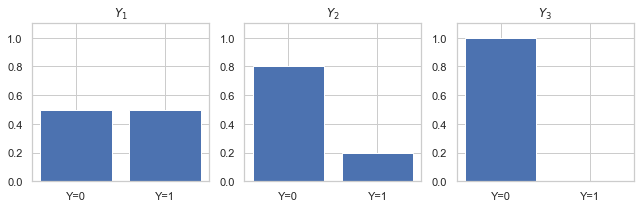

In [3]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar([0, 1], [0.5, 0.5])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_1$")
plt.subplot(132)
plt.bar([0, 1], [0.8, 0.2])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_2$")
plt.subplot(133)
plt.bar([0, 1], [1.0, 0.0])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_3$")
plt.tight_layout()
plt.show()

In [4]:
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [5]:
-0.8 * np.log2(0.8) - 0.2 * np.log2(0.2)

0.7219280948873623

In [6]:
eps = np.finfo(float).eps
-1 * np.log2(1) - eps * np.log2(eps)

1.1546319456101628e-14

In [7]:
p = [0.5, 0.5]
sp.stats.entropy(p, base=2)

1.0

### 지니불순도
- 엔트로피와 유사한 개념으로 지니불순도(Gini impurity)

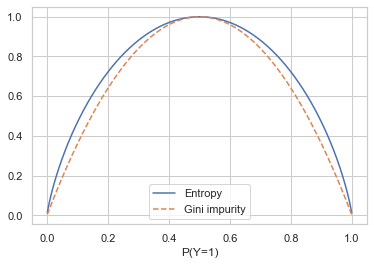

In [9]:
P0 = np.linspace(0.001, 1 - 0.001, 1000)
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
G = 2 * (P0 * (1 - P0) + P1 * (1 - P1))

plt.plot(P1, H, "-", label="Entropy")
plt.plot(P1, G, "--", label="Gini impurity")
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()

### 엔트로피 최대화
- 엔트로피  $H[p(x)]$ 를 가장 크게 만드는 확률밀도함수  $p(x)$ 는 정규분포가 된다

### 가변길이 인코딩
- 엔트로피는 원래 통신 분야에서 데이터가 가지고 있는 정보량을 계산하기 위해 고안되었다. 예를 들어 4개의 글자 A, B, C, D로 씌여진 다음과 같은 문서가 있다고 하자.

In [11]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'ADAAAAACBBBDAACCBCADAAACBABDAAAADABACBBDADAAABABAABBCBADDBBBBCDCADAAACCBACABCAAACBAABAAABACAAAAADAAABDAADAAAADABCADAAABACADABAABCAAABAAAABCAAAABBAADDABADACCBABBBCAABAAABAABBBBADABAABDABADAABCDABCBDBAC'

In [12]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
encoded_doc

'0011000000000010010101110000101001100011000000100100011100000000110001001001011100110000000100010000010110010011110101010110111000110000001010010010000110000000100100000100000001001000000000001100000001110000110000000011000110001100000001001000110001000001100000000100000000011000000000010100001111000100110010100100010101100000010000000100000101010100110001000001110001001100000110110001100111010010'

In [13]:
len(encoded_doc)

400

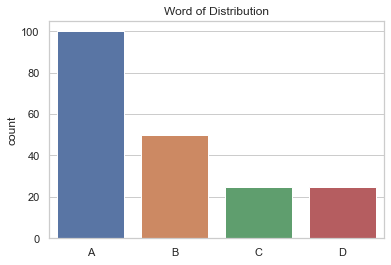

In [15]:
sns.countplot(list(doc), order="ABCD")
plt.title("Word of Distribution")
plt.show()